# Problem

$\blacktriangleright$ Here we solve a multiphysics problem through the one way coupling of incompressible Navier-Stokes equation and a time dependent advection-diffusion problem for the concentration of a chemical specie in the domain. The adopted schemes are _Backward Euler_ (BE) in time while _Galerkin_ one in space

1. The full problem in strong form reads
$$
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t}-\text{div}(\nu(\nabla u + \nabla u^T)) + (u\cdot \nabla)u +\nabla p=0 &\qquad in \thinspace \Omega \times (0,T)\\
        \text{div}u=0 &\qquad in \thinspace \Omega \times (0,T)\\
        \frac{\partial c}{\partial t} -k\Delta c + u\cdot \nabla c =0 &\qquad in \thinspace \Omega \times (0,T)\\
        u=10y(0.2-y) &\qquad on \thinspace \Gamma_{in}\\
        (2\nu D(u)-pI)n=0 &\qquad on \thinspace \Gamma_{out}\\
        u=0 &\qquad on \thinspace \Gamma_{walls}\\
        c=1\cdot 10^{-15} &\qquad in \thinspace \Omega,t=0\\
        c=0 &\qquad on \thinspace \Gamma_{in}\\
        \nabla_n c=0 &\qquad on \thinspace \Gamma_{walls}\\
    \end{cases}
\end{equation}
$$
Here the velocity field calculated by means of the NS equation enters as the advective field in the transport term for the concentration equation of species. Then we have a parabolic profile as inlet for the fluid velocity an homogeneous Neumann condition i.e. outflow conditions for the fluid just like for the concentration. The fluid is initially stagnant. The problem will be solved employing the _Incremental Chorin-Theman_ splitting procedure.

2. Incremental Chorin-Theman procedure for both velocity and pressure for the NS equation, while the equation for the concentration is discretized using classical BE and Galerkin</br>
$\bullet$ step 1
$$\begin{equation}
    \begin{cases}
        \frac{u^{n+1}-u^n}{\Delta t}-\nu\Delta u^{n+1} + (u^n\cdot\nabla)u^{n+1}=-\nabla p^{n} &\qquad in \thinspace \Omega\\
        u=0 &\qquad on \thinspace \Gamma_{walls}\\
        u=10y(0.2-y)  &\qquad on \thinspace \Gamma_{in}\\
    \end{cases}
\end{equation}$$
$\bullet$ step 2
\begin{equation}
    \begin{cases}
        -\Delta \delta p =-\frac{1}{\Delta t}\text{div}\tilde{u} &\qquad in \thinspace \Omega\\
        \delta p =0 &\qquad on \thinspace \Gamma_{out}\\
        \nabla \delta p \cdot n=0 &\qquad on \thinspace \partial \Omega/\Gamma_{out}
    \end{cases}
\end{equation}
$\bullet$ step 3
\begin{equation}
    \begin{cases}
    u^{n+1}=\tilde{u}-\Delta t\nabla \delta p\\
    p^{n+1}=p^n +\delta p
\end{cases}
\end{equation}
$\bullet$ step 4
\begin{equation}
        \frac{c^{n+1}-c^n}{\Delta t} -k\Delta c^{n+1} +u^{n+1}\cdot \nabla c^{n+1}=0
\end{equation}

3. The adopted functional spaces are </br>
$\ast$ for the velocity field
$$V_0=[H^1_{\partial\Omega / \Gamma_{out}}(\Omega)]^2$$
$$V_D=\{v\in [H^1(\Omega)]^2: v\vert_{\Gamma_{walls}}=0,\thinspace v\vert_{\Gamma{in}}=g\}$$
$\ast$ for the pressure field
$$Q\in [H^1_{\Gamma_{out}}(\Omega)]^2$$
$\ast$ for the concentration field that is a scalar just like the pressure one
$$Z_0={[H^1_{\partial\Omega/\Gamma_{in}}(\Omega)}]^2$$
$$Z_D=\{w\in [H^1(\Omega)]^2: w\vert_{\Gamma_{in}}=0\}$$

4. Weak formulation of the problem</br>
$\blacktriangleright$ step 1
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega}u^{n+1}vd\Omega +\nu\int_{\Omega}D( u):D(v)d\Omega +\int_{\Omega}(u^n\cdot\nabla)u^{n+1}vd\Omega=-\int_{\Omega}\nabla p^n vd\Omega \\ +\frac{1}{\Delta t}\int_{\Omega}u^n v d\Omega
\end{align}
$\blacktriangleright$ step 2
\begin{align}
    \int_{\Omega}\nabla \delta p:\nabla q d\Omega = -\frac{1}{\Delta t}\int_{\Omega}\text{div}u^{n+1}qd\Omega
\end{align}
$\blacktriangleright$ step 3
\begin{align}
    \int_{\Omega}u^{n+1}vd\Omega=\int_{\Omega}\tilde{u}vd\Omega -\Delta t\int_{\Omega}\nabla\delta p v d\Omega
\end{align}
$\blacktriangleright$ step 4
\begin{align}
    \frac{1}{\Delta t}\int_{\Omega} c^{n+1}wd\Omega +\int_{\Omega}k\nabla c^{n+1}:\nabla w d\Omega +\int_{\Omega}u^{n+1}\cdot \nabla c^{n+1}d\Omega=\frac{1}{\Delta t}\int_{\Omega}c^nwd\Omega
\end{align}
what should be noticed here is that in the conentration equation the velocity field enters at the $u^{n+1}$ iteration that could be initially percieved as non-linear while on the contrary is not, since the velocity profile is already calculated from the NS equation

5. Bonus </br>
The full system can be solved as a full non-linear problem avoiding the splitting procedure using SNES that will automatically linearize the problem using specified Newton solvers, but in this case the time needed for the solution of N-linear-systems (needed at each time-step) will be huge comparaed to the extreme simplification introduced by the Incremental-Chorin-Theman procedure, that instead solves only three linear systems (for the NS equation) plus one for the concentration equation.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

--2025-03-06 15:45:26--  https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.110.153, 185.199.108.153, 185.199.109.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4601 (4.5K) [application/x-sh]
Saving to: ‘/tmp/firedrake-install.sh’

/tmp/firedrake-inst 100%[===================>]   4.49K  --.-KB/s    in 0s      

2025-03-06 15:45:26 (39.2 MB/s) - ‘/tmp/firedrake-install.sh’ saved [4601/4601]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FIREDRAKE_INSTALLED=/usr/local/share/fem-on-colab/firedrake.installed
+ [[ ! -f /usr/local/share/fem-on-colab/firedrake.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/8a21

---

Setup environment and output path

In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

In [ ]:
# Get current path: all relative paths that you may use for input/output start from here.
#
# - Colab:  The default path is /content, and your GDrive folder is accessible (if mounted) at /content/drive/MyDrive
#
# - local:  If running on your local machine, current_path is the position WHERE YOU LAUNCHED THE NOTEBOOK KERNEL BY 'jupyter notebook'
#           and NOT the directory in which this ipynb file is saved.
#           If you want to modify your current path, go to the terminal, stop the kernel (ctrl-C + press y), then move to the desired path by
#           cd my/desired/path/starting/from/here
#           and then launch 'jupyter notebook'.
import os
current_path = os.getcwd()
print(current_path)


basename = '...'
outfileU = File("/content/drive/MyDrive/velocity.pvd")
outfileP = File("/content/drive/MyDrive/pressure.pvd")
outfileC = File("/content/drive/MyDrive/concentration.pvd")


/content


/usr/local/lib/python3.11/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


---
---
# Exercise

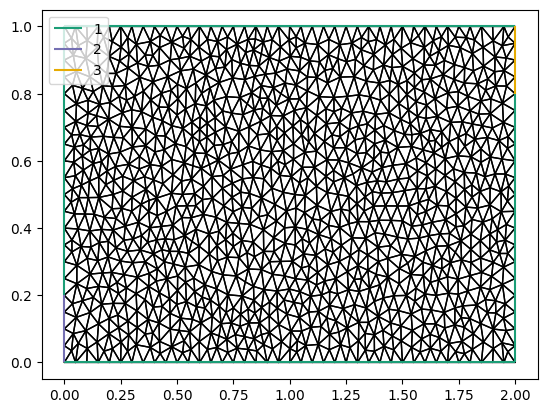

In [ ]:
# Import mesh: set the path correctly!
mesh = Mesh('/content/drive/MyDrive/meshes/pool.msh')
fig, ax = plt.subplots()
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

### FE spaces, data, BCs

In [ ]:
# Function spaces
V=VectorFunctionSpace(mesh, 'P', 2)
Q=FunctionSpace(mesh, 'P', 1)
C=FunctionSpace(mesh, 'P', 1)

# Data
nu = 0.01
k = 1e-4
t = 0
dt=0.5
T=10
x = SpatialCoordinate(mesh)
u_in=(10*10*x[1]*(0.2-x[1]),0)
u_noslip=Constant((0,0))

# Boundary conditions for the Chorin-Temam steps and the concentration problem
bc_in=DirichletBC(V, u_in, 2)
bc_noslip=DirichletBC(V, u_noslip, 1)
bc_pressure=DirichletBC(Q, Constant(0), 3)
bc_c=DirichletBC(C, Constant(0),2)

bcsU = (bc_in,bc_noslip)
bcsP = (bc_pressure)
bcsC = (bc_c)

### Initial condition

In [ ]:
uh_old = Function(V)
ph_old = Function(Q)
ch_old = Function(C)


Ellipsis

### Post-processing

In [ ]:
# vtk output for Paraview
uh_old.rename("Velocity")   # this names will be used in Paraview
ph_old.rename("Pressure")
ch_old.rename("Concentration")


outfileU.write(uh_old)
outfileP.write(ph_old)
outfileC.write(ch_old)

# Compute mean concentration, given a concentration field ch
def mean_concentration(ch):
    return assemble(ch*dx)


### Variational forms for incremental Chorin-Temam steps and passive scalar problem

In the inputs:<br>
*u, dp, c* are trial functions,<br>
*v, q, w* are corresponding test functions,<br>
*dt* is the time step length $\Delta t$,<br>
the suffix *..._old* denotes variables evaluated at the **previous time step**,<br>
the suffix *..._tilde* denotes variables computed at a **previous sub-step**, but associated to the **current time-step**.<br>


In [ ]:
# Forms for step 1 (incremental Chorin-Temam)
def predictor_forms( u, v, nu, p_old, u_old, dt ):
    a=1/dt*dot(u,v)*dx\
      +nu*inner(sym(grad(u)),sym(grad(v)))*dx\
      +dot(dot(grad(u),u_old),v)*dx

    L=1/dt*dot(u_old,v)*dx\
      -inner(grad(p_old),v)*dx

    return a,L

# Forms for step 2 (incremental Chorin-Temam)
def pressure_forms( dp, q, dt, u_tilde ):
    a=inner(grad(dp),grad(q))*dx

    L=-1/dt*dot(div(u_tilde),q)*dx

    return a,L

# Forms for step 3 (incremental Chorin-Temam)
def projection_forms( u,v,dt,dp,u_tilde ):
    a=inner(u,v)*dx
    L=inner(u_tilde,v)*dx\
      - dt*inner(grad(dp),v)*dx

    return a,L

# Forms for concentration equation
def concentration_forms(c, uh, w, k, dt, c_old ):
    a= 1/dt*inner(c,w)*dx\
       +k*inner(grad(c),grad(w))*dx\
       +dot(uh,grad(c))*w*dx

    L= 1/dt*inner(c_old,w)*dx
    return a,L

### Definition of the steps of the solver

In [ ]:
# Trial and test functions
u=TrialFunction(V)
v=TestFunction(V)
dp=TrialFunction(Q)
q=TestFunction(Q)
c=TrialFunction(C)
w=TestFunction(C)

# Actual solution
uh = Function(V)
dph = Function(Q)       # incremental
ch = Function(C)

uh.interpolate(u_noslip)
dph.interpolate(Constant(0))
ch.interpolate(Constant(1e-15)) #circa 0, ma non-0 in quanto se fosse Constant(0) la concentrazione sarebbe nulla, cioè sarebbe inutile risolvere la diffusione di specie!

uh_old.assign(uh)
ph_old.assign(dph)
ch_old.assign(ch)

# Chorin-Temam step 1
a1, L1 = predictor_forms( u,v, nu,ph_old,uh_old,dt)
step1_pb = LinearVariationalProblem(a1, L1, uh, bcs=bcsU)
step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 2
a2, L2 = pressure_forms( dp,q,dt,uh )
step2_pb = LinearVariationalProblem(a2, L2, dph, bcs=bcsP)
step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Chorin-Temam step 3
a3, L3 = projection_forms( u,v,dt,dph,uh )
step3_pb = LinearVariationalProblem(a3, L3, uh) # no BCs
step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

# Step 4: temperature problem
a4, L4 = concentration_forms(c, uh, w, k, dt, ch_old )
concentration_pb = LinearVariationalProblem(a4, L4, ch, bcs=bcsC)
concentration = LinearVariationalSolver(concentration_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

### Time-dependent solution

In [ ]:
t_vec = np.arange(0, T+0.1*dt, dt)  # T+0.1*dt to include also T: range/arange exclude the upper bound of the range
meanconc = [0.0] * len(t_vec)
meanconc[0] = mean_concentration(ch_old)


for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t_val = t_vec[ii]
    print('Time = ', t_val)
    print('||u||_{H^1} =', norm(uh_old,'H1'), '  ||p||_{L^2} =', norm(ph_old,'L2'),'  ||c||_{L^2} =', norm(ch_old,'L2'))

    step1.solve()
    step2.solve()
    step3.solve()
    concentration.solve()

    a1, L1 = predictor_forms( u,v, nu,ph_old,uh_old,dt)
    step1_pb = LinearVariationalProblem(a1, L1, uh, bcs=bcsU)
    step1 = LinearVariationalSolver(step1_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

    a2, L2 = pressure_forms( dp,q,dt,uh )
    step2_pb = LinearVariationalProblem(a2, L2, dph, bcs=bcsP)
    step2 = LinearVariationalSolver(step2_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

    a3, L3 = projection_forms( u,v,dt,dph,uh )
    step3_pb = LinearVariationalProblem(a3, L3, uh) # no BCs
    step3 = LinearVariationalSolver(step3_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

    a4, L4 = concentration_forms(c, uh, w, k, dt, ch_old )
    concentration_pb = LinearVariationalProblem(a4, L4, ch, bcs=bcsC)
    concentration = LinearVariationalSolver(concentration_pb, solver_parameters={'ksp_type': 'preonly', 'pc_type':'lu'})

    meanconc[ii]=mean_concentration(ch)

    uh.rename("Velocity")
    dph.rename("Pressure")
    ch.rename("Concentration")
    outfileU.write(uh)
    outfileP.write(dph)
    outfileC.write(ch)

    uh_old.assign(uh)
    ph_old.assign(dph)
    ch_old.assign(ch)

    # Post-processing
    outfileU.write(uh_old, time=t_val)
    outfileP.write(ph_old, time=t_val)
    outfileC.write(ch_old, time=t_val)


Time =  0.5
||u||_{H^1} = 0.0   ||p||_{L^2} = 0.0   ||c||_{L^2} = 1.4142135623730953e-15
Time =  1.0
||u||_{H^1} = 2.5351609923824237   ||p||_{L^2} = 0.6793485561307864   ||c||_{L^2} = 1.378480791521827e-15
Time =  1.5
||u||_{H^1} = 3.356278863195718   ||p||_{L^2} = 0.3231740278632076   ||c||_{L^2} = 1.3468430370508382e-15
Time =  2.0
||u||_{H^1} = 2.5092359711571235   ||p||_{L^2} = 0.4409393136449189   ||c||_{L^2} = 1.3158500650326437e-15
Time =  2.5
||u||_{H^1} = 2.9183159071107325   ||p||_{L^2} = 0.1949499662466677   ||c||_{L^2} = 1.2845821769601449e-15
Time =  3.0
||u||_{H^1} = 2.6915035446526923   ||p||_{L^2} = 0.329069602585759   ||c||_{L^2} = 1.2524781918941112e-15
Time =  3.5
||u||_{H^1} = 2.9212108433145074   ||p||_{L^2} = 0.12430469562465615   ||c||_{L^2} = 1.2197649986838639e-15
Time =  4.0
||u||_{H^1} = 2.8225920885086   ||p||_{L^2} = 0.2581606769585119   ||c||_{L^2} = 1.1861166874642899e-15
Time =  4.5
||u||_{H^1} = 2.963297872283029   ||p||_{L^2} = 0.08088007913730093   |

Final value: 9.072146969298791e-16


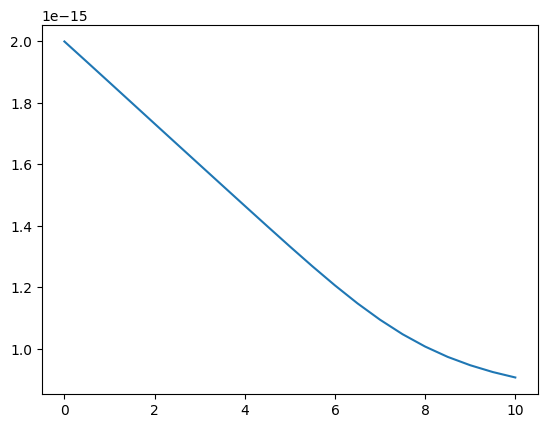

In [ ]:
fig, ax1 = plt.subplots()
line = ax1.plot(t_vec, meanconc)
print('Final value:', meanconc[-1])

Text(0.5, 1.0, 'concentration')

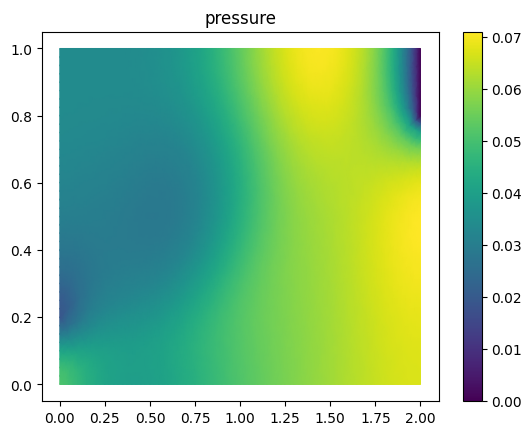

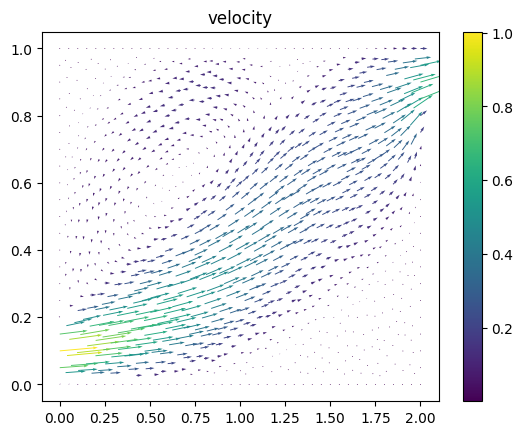

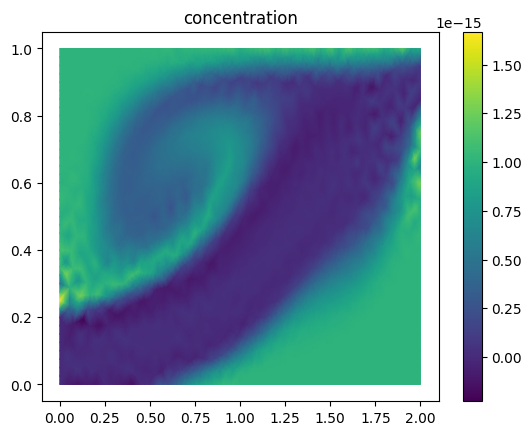

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(dph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')
fig, ax = plt.subplots()
col = tripcolor(ch, axes=ax)
plt.colorbar(col)
plt.title('concentration')